In [ ]:
!pip install biopython 
from Bio import Entrez
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Task-1

In [41]:
## Extract sequences with ID as in input
def seq_extract(Id):
  handle = Entrez.efetch(db="nucleotide", id=Id, rettype="fasta", retmode="xml")
  record = Entrez.read(handle,"fasta") 
  handle.close()
  rec1 =record[0] #record is an array of dictionaries, get the first entry
  seq = rec1['TSeq_sequence']
  return seq

Question 1

In [ ]:
wuhan = seq_extract("NC_045512.2")
wuhan = wuhan[21535:25384] # sliced to fetch S-proteins encoding 

omicron = seq_extract("OM095411.1")
omicron = omicron[21487:25327] # sliced to fetch S-proteins encoding 

hiroshima = seq_extract("OL638173.1")
hiroshima = hiroshima[21510:25353] # sliced to fetch S-proteins encoding 


In [43]:
len(wuhan),len(omicron),len(hiroshima)

(3849, 3840, 3843)

In [44]:
# slicing the given RBD regoin in the sequences as per the problem
wuhan_rbd = wuhan[1374 :1449]
omicron_rbd = omicron[1374 :1449]
hiroshima_rbd = hiroshima[1374 :1449]

Question 2

In [45]:
# Plots dot plt of the matrix using imshow method
# logic - intializes a zero matrix of the "seq1 x seq2" shape. populates a value at any index iteratively, by adding 1 to the prior diagonal value if the sequences have same neucleaotide at that index
def dot_plot(seq1,seq2,run_len_thres = 7):

  run_len_mat = np.zeros((len(seq1),len(seq2))) # intialize the run length matrix

  for i in range(run_len_mat.shape[0]):
    for j in range(run_len_mat.shape[1]):
      
      if seq1[i] == seq2[j]: # checks if the neucleotides are same at any given index
        run_len_mat[i,j] = 1
        if ((i-1 >= 0) & (j-1 >= 0)) :
          run_len_mat[i,j] = run_len_mat[i-1,j-1] + 1    # adds 1 to the prior diagonal element
          
  run_len = int(np.max(run_len_mat))

  sns.set(font_scale = .8) # print the NW matrix
  fig, ax = plt.subplots(figsize=(10, 8))
  y_lbl = list(seq1)
  x_lbl = list(seq2)
  ax = sns.heatmap(run_len_mat,xticklabels=x_lbl, yticklabels=y_lbl,cmap='coolwarm',fmt='.1f')
  plt.yticks(rotation=0)
  ax.xaxis.tick_top()
  plt.show()
  
  if run_len >= run_len_thres: # check if the maximum value of run length is greater than a threshold and returns the starting index of the run length diagonal
    x,y = np.where(run_len_mat == run_len)
    Index = []
    for i,j in zip(x,y):
      Index.append((i+1-run_len,j+1-run_len))
    return run_len,Index
  else:
    return 0 , (-1,-1)

DOT-Plot between Wuhan and the Omicron


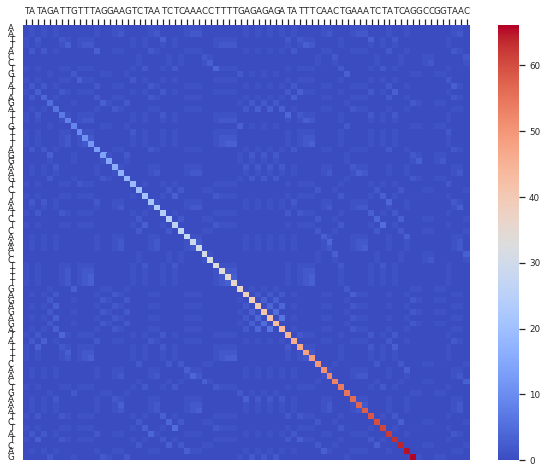

DOT-Plot between Omicron and the Hiroshima 



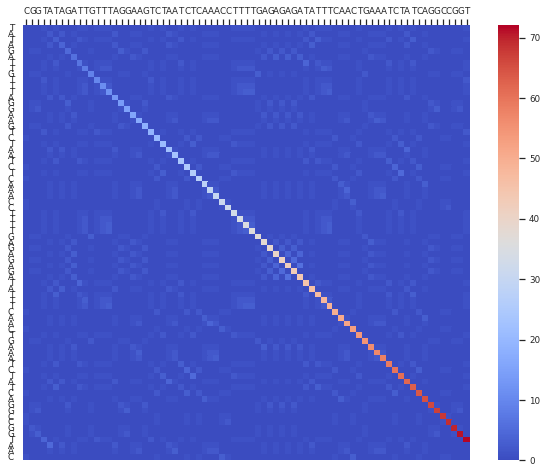

DOT-Plot between Wuhan and the Hiroshima 



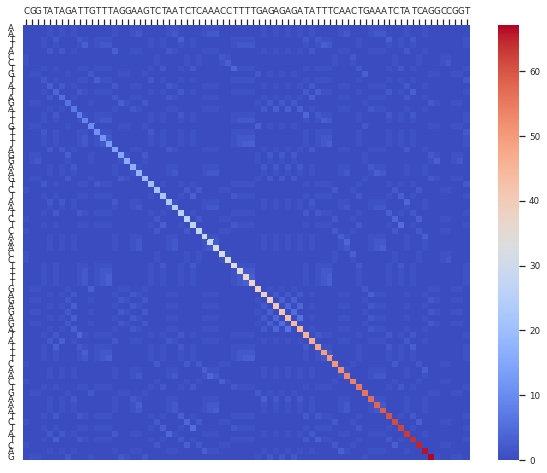

In [46]:
print("DOT-Plot between Wuhan and the Omicron")
w_o = dot_plot(wuhan_rbd,omicron_rbd)
print("DOT-Plot between Omicron and the Hiroshima","\n")
o_h = dot_plot(omicron_rbd,hiroshima_rbd)
print("DOT-Plot between Wuhan and the Hiroshima","\n")
w_h = dot_plot(wuhan_rbd,hiroshima_rbd)

A bit more details duduced from the dot plots

In [47]:
# WUHAN and OMICRON
run_len = w_o[0]
ind = w_o[1][0]
print("Run_length:",run_len," , Start Indexes in Wuhan '{}' and Omicron '{}'".format(ind[0],ind[1]))
print("WUHAN ->",wuhan_rbd[0:ind[0]],"\033[0;37;40m{}".format(wuhan_rbd[ind[0]:ind[0]+run_len]),"\033[0;37;0m{}".format(wuhan_rbd[ind[0]+run_len:]))
print("OMICRON ->",omicron_rbd[0:ind[1]],"\033[0;37;40m{}".format(omicron_rbd[ind[1]:ind[1]+run_len]),"\033[0;37;0m{}".format(omicron_rbd[ind[1]+run_len:]))


Run_length: 66  , Start Indexes in Wuhan '9' and Omicron '0'
WUHAN -> AATTACCTG TATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAG 
OMICRON ->  TATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAG GCCGGTAAC


In [48]:
# OMICRON and HIROSHIMA
run_len = o_h[0]
ind = o_h[1][0]
print("Run_length:",run_len," , Start Indexes in Omicron '{}' and Hiroshima '{}'".format(ind[0],ind[1]))
print("OMICRON ->",omicron_rbd[0:ind[0]],"\033[0;37;40m{}".format(omicron_rbd[ind[0]:ind[0]+run_len]),"\033[0;37;0m{}".format(omicron_rbd[ind[0]+run_len:]))
print("HIROSHIMA ->",hiroshima_rbd[0:ind[1]],"\033[0;37;40m{}".format(hiroshima_rbd[ind[1]:ind[1]+run_len]),"\033[0;37;0m{}".format(hiroshima_rbd[ind[1]+run_len:]))


Run_length: 72  , Start Indexes in Omicron '0' and Hiroshima '3'
OMICRON ->  TATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGT AAC
HIROSHIMA -> CGG TATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGT 


In [49]:
# WUHAN and HIROSHIMA
run_len = w_h[0]
ind = w_h[1][0]
print("Run_length:",run_len," , Start Indexes in Omicron '{}' and Hiroshima '{}'".format(ind[0],ind[1]))
print("WUHAN ->",wuhan_rbd[0:ind[0]],"\033[0;37;40m{}".format(wuhan_rbd[ind[0]:ind[0]+run_len]),"\033[0;37;0m{}".format(wuhan_rbd[ind[0]+run_len:]))
print("HIROSHIMA ->",hiroshima_rbd[0:ind[1]],"\033[0;37;40m{}".format(hiroshima_rbd[ind[1]:ind[1]+run_len]),"\033[0;37;0m{}".format(hiroshima_rbd[ind[1]+run_len:]))


Run_length: 67  , Start Indexes in Omicron '8' and Hiroshima '2'
WUHAN -> AATTACCT GTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAG 
HIROSHIMA -> CG GTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAG GCCGGT


Question-3

In [50]:
# initializing the rho(list of neuceotide) and the corresponding scoring matrix, used across the code.
rho = list("-ACGT")
scrng_mat = 2*np.identity(len(rho)) + (-1)*np.ones((len(rho),len(rho)))
scrng_mat[0,0] = 0 # kept the value as 0 at the first index, so that it could be used in pairwise alignment and alignment of alignments

In [51]:
scrng_mat # so the row and the column are in the order ['-', 'A', 'C', 'G', 'T']

array([[ 0., -1., -1., -1., -1.],
       [-1.,  1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1.],
       [-1., -1., -1.,  1., -1.],
       [-1., -1., -1., -1.,  1.]])

In [52]:
# Needleman Wunch algorithm, return the NW matrix
def nwa(seq1,seq2): 

  NW_mat = np.zeros((len(seq1)+1,len(seq2)+1)) # intialize the matrix

  for i in range(NW_mat.shape[0]):
    for j in range(NW_mat.shape[1]):
      if i==0:
        if j==0:
          NW_mat[i,j] == 0
        else:
          NW_mat[i,j] = NW_mat[i,j-1] + scrng_mat[rho.index(seq2[j-1]),rho.index("-")] # populates the first row
      else :
        if  j == 0: 
          NW_mat[i,j] = NW_mat[i-1,j] + scrng_mat[rho.index(seq1[i-1]),rho.index("-")] # populates the first column
        else:
          #print(1)
          NW_mat[i,j] = max(NW_mat[i-1,j-1] + scrng_mat[rho.index(seq1[i-1]),rho.index(seq2[j-1])], # populates rest of the matrix by using max as per the logic
                            NW_mat[i-1,j] + scrng_mat[rho.index(seq1[i-1]),rho.index("-")],
                            NW_mat[i,j-1] + scrng_mat[rho.index(seq2[j-1]),rho.index("-")])

  return NW_mat

In [53]:
# Prints a chart for one of the possible way to backtrack the Needleman wunch(NW) matrix.
# And also returns the alignmnets by adding gap charaters wherever required.
def backtr(seq1,seq2,prnt_bktr):
  nwmat = nwa(seq1,seq2) # used NW function written above to fetch the matrix
  backtrack_mat = np.zeros((len(seq1)+1,len(seq2)+1)) # initializing the back track matrix
  i,j = nwmat.shape[0]-1, nwmat.shape[1]-1
  backtrack_mat[i,j] = 200
  alg_seq1 = ""
  alg_seq2 = ""
  p = []
  while i > 0 or j > 0: # starts with the bottom right corner
  # checks that which term resulted in populating the given index.
    ls = [nwmat[i-1,j-1] + scrng_mat[rho.index(seq1[i-1]),rho.index(seq2[j-1])], # north-west element
                              nwmat[i-1,j] + scrng_mat[rho.index(seq1[i-1]),rho.index("-")], # west element
                              nwmat[i,j-1] + scrng_mat[rho.index(seq2[j-1]),rho.index("-")]] # north element
    # Using Argmax function to get the index of the max value in list "ls" above
    # Argmax returns the 1st index in case more than one index has the max value. that is why it is one of the possible backtracking path.
    p.append(np.argmax(ls))
    # updating the indexes based on the result of argmax and adding gap character when it is not the north-west element
    if np.argmax(ls) == 0: # for north-west
      i = i-1
      j = j-1
      alg_seq1 += seq1[i]
      alg_seq2 += seq2[j]
    elif np.argmax(ls) == 1: # for west
      i = i-1
      alg_seq1 += seq1[i]
      alg_seq2 += "-"
    else: # for north
      j = j-1
      alg_seq1 += "-"
      alg_seq2 += seq2[j]

    backtrack_mat[i,j] = 200
  if prnt_bktr == 1:
    plt.imshow(backtrack_mat,cmap = "viridis") # plots the backtrack matrix
    plt.grid(False)
  alg_seq1 = alg_seq1[::-1] # reversing the sequences to show the right order
  alg_seq2 = alg_seq2[::-1]


  return alg_seq1, alg_seq2 # return the alignments

In [54]:
# return the pipe character based on same necleotide in the alignment # for visualisation
def map_array1(seq1,seq2):
  ar = ""
  for i,j in zip(seq1,seq2):
    if i==j:
      ar += "|"
    else:
      ar += " "
  return ar

NW-score for WUHAN and OMICRON -> 48.0
AATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCA-----G----
         |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||     |    
---------TATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC 

Plots for Backtrack & NW matrix


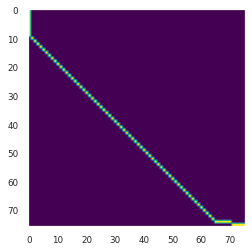

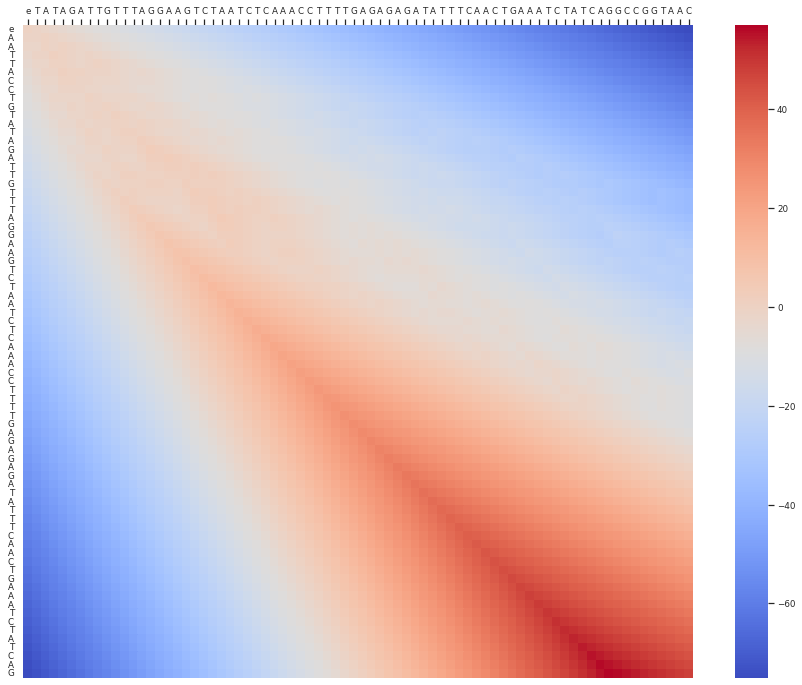

In [55]:
print("NW-score for WUHAN and OMICRON ->", nwa(wuhan_rbd,omicron_rbd)[len(wuhan_rbd),len(omicron_rbd)])
alg_wo,alg_ow = backtr(wuhan_rbd,omicron_rbd,1) # pairwise alignment
nwmat = nwa(wuhan_rbd,omicron_rbd) # NW matrix
print(alg_wo)
print(map_array1(alg_wo,alg_ow))
print(alg_ow,"\n")
print("Plots for Backtrack & NW matrix")
sns.set(font_scale = .8) # plot the NW matrix
fig, ax = plt.subplots(figsize=(15, 12))
y_lbl = list("e"+wuhan_rbd)
x_lbl = list("e"+omicron_rbd)
ax = sns.heatmap(nwmat,xticklabels=x_lbl, yticklabels=y_lbl,cmap='coolwarm',fmt='.1f')
plt.yticks(rotation=0)
ax.xaxis.tick_top()
plt.show()

NW-score for OMICRON and HIROSHIMA -> 66.0
---TATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC
   ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||   
CGGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGT--- 

Plot for Backtrack & NW matrix


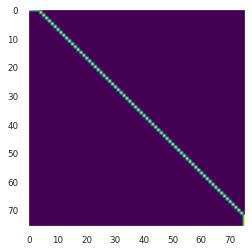

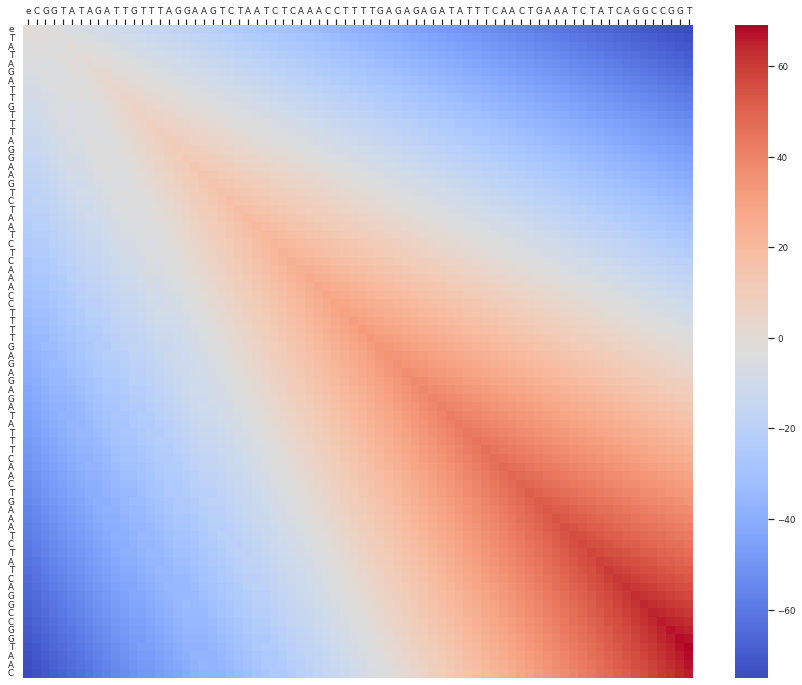

In [56]:
# similarly for Omicron and Hiroshima sequences
print("NW-score for OMICRON and HIROSHIMA ->", nwa(omicron_rbd,hiroshima_rbd)[len(omicron_rbd),len(hiroshima_rbd)])
alg_oh,alg_ho = backtr(omicron_rbd,hiroshima_rbd,1)
nwmat = nwa(omicron_rbd,hiroshima_rbd)
print(alg_oh)
print(map_array1(alg_oh,alg_ho))
print(alg_ho,"\n")
print("Plot for Backtrack & NW matrix")
sns.set(font_scale = .8)
fig, ax = plt.subplots(figsize=(15, 12))
y_lbl = list("e"+omicron_rbd)
x_lbl = list("e"+hiroshima_rbd)
ax = sns.heatmap(nwmat,xticklabels=x_lbl, yticklabels=y_lbl,cmap='coolwarm',fmt='.1f')
plt.yticks(rotation=0)
ax.xaxis.tick_top()
plt.show()

NW-score for WUHAN and HIROSHIMA -> 55.0
AATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCA-----G-
      | ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||     | 
------CGGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGT 

Plot for Backtrack & NW matrix


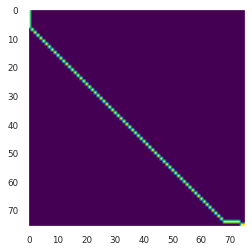

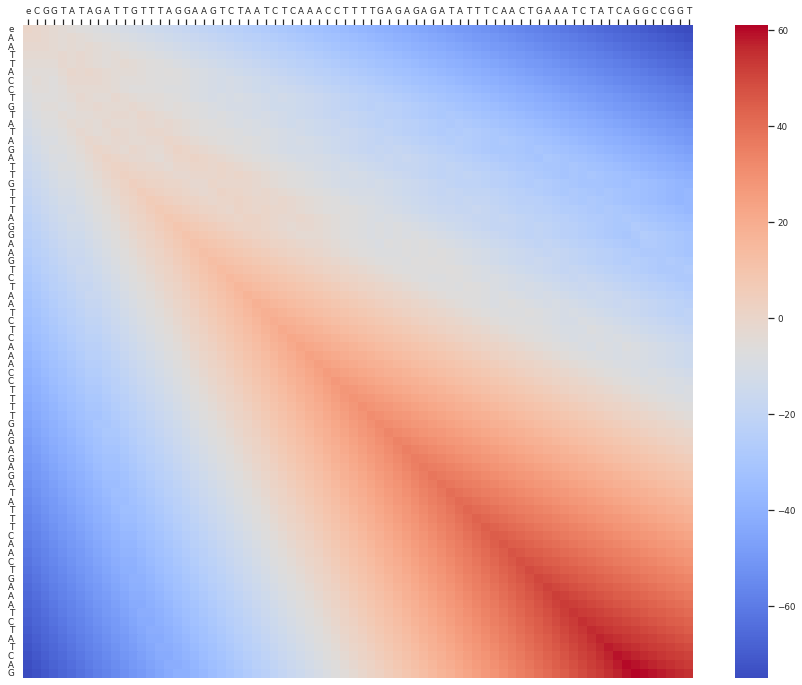

In [57]:
# similarly for Wuhan and Hiroshima sequences
print("NW-score for WUHAN and HIROSHIMA ->", nwa(wuhan_rbd,hiroshima_rbd)[len(wuhan_rbd),len(hiroshima_rbd)])
alg_wh,alg_hw = backtr(wuhan_rbd,hiroshima_rbd,1)
nwmat = nwa(wuhan_rbd,hiroshima_rbd)
print(alg_wh)
print(map_array1(alg_wh,alg_hw))
print(alg_hw,"\n")
print("Plot for Backtrack & NW matrix")
sns.set(font_scale = .8)
fig, ax = plt.subplots(figsize=(15, 12))
y_lbl = list("e"+wuhan_rbd)
x_lbl = list("e"+hiroshima_rbd)
ax = sns.heatmap(nwmat,xticklabels=x_lbl, yticklabels=y_lbl,cmap='coolwarm',fmt='.1f')
plt.yticks(rotation=0)
ax.xaxis.tick_top()
plt.show()

Question 4

In [58]:
# zips all the sequences in a list of alignments in a single list
# For Ex:, if input = ["CTG","ATC"], then output would look like ['CA', 'TT', 'GC'], basically the flattened columns in the alignments.
def zip_seq (seq_alg):
  zipped_ls = []
  for i in range(len(seq_alg[0])) :
    tmp_ls = []
    for j in seq_alg:
      tmp_ls.append(j[i])
    zipped_ls.append("".join(tmp_ls))

  return zipped_ls

# calculates score for all the combinations of necleotides of that row and column, using scoring matrix intialized above
def cal_score(seq1,seq2):
  all_comb = [[seq1[i],j] for i in range(len(seq1)) for j in seq2] # creates a list of all possible combination
  score = 0
  for comb in all_comb:
    score+=scrng_mat[rho.index(comb[0]),rho.index(comb[1])] # iteratively adds scores for all the combinations
  return score

# Extension of the above NW algorithm, a generalised form of NW algo to provide alignment of alignments. An alignment can have multiple sequences in it.
def ext_nwa(seq_alg1,seq_alg2): # two different alignments as an input
  # zipped both the alignments
  zipped_ls1 = zip_seq(seq_alg1)
  zipped_ls2 = zip_seq(seq_alg2)
  #print(zipped_ls1,zipped_ls2)
  NW_mat = np.zeros((len(zipped_ls1)+1,len(zipped_ls2)+1)) # intialised the NW matrix
  for i in range(NW_mat.shape[0]):
    for j in range(NW_mat.shape[1]):
       if i==0:
        if j==0:
          NW_mat[i,j] == 0
        else: # calling cal_score function to calculate the scores for all comb and rest all is same as above NW algo.
          NW_mat[i,j] = NW_mat[i,j-1] + cal_score(zipped_ls2[j-1],"-"*len(zipped_ls1[0])) 
       else :
        if  j == 0: 
          NW_mat[i,j] = NW_mat[i-1,j] + cal_score(zipped_ls1[i-1],"-"*len(zipped_ls2[0]))
    
        else:
          NW_mat[i,j] = max(NW_mat[i-1,j-1] + cal_score(zipped_ls1[i-1],zipped_ls2[j-1]),
                              NW_mat[i-1,j] + cal_score(zipped_ls1[i-1],"-"*len(zipped_ls2[0])),
                              NW_mat[i,j-1] + cal_score(zipped_ls2[j-1],"-"*len(zipped_ls1[0]))
                              )

  return NW_mat

In [59]:
# an example to demonstrate that the logic works fine with the example solved in the lecture.
seq_alg1 = ["CCA"]
seq_alg2 = ["TATG-","ATGGA"]
ext_nwa(seq_alg1,seq_alg2)

array([[ 0., -2., -4., -6., -8., -9.],
       [-2., -2., -4., -6., -8., -9.],
       [-4., -4., -4., -6., -8., -9.],
       [-6., -4., -4., -6., -8., -8.]])

In [60]:
# Bring back the alignment sequences from the the zipped order(highlighted in the 1st snipped of Q-4)
def get_seq(zipped_ls1):
    org_seq_ls = []
    for i in range(len(zipped_ls1[0])):
        org_seq =''
        for j in zipped_ls1:
            org_seq+=j[i]
        org_seq_ls.append(org_seq)
    
    return org_seq_ls

# Similar to above backtrack logic, with little changes to cater the allignments as well.
# works fine for two sequences as well, one need to just pass them in a list, ex :- backtr_ext([seq1],[seq2]) 
def backtr_ext(seq_alg1,seq_alg2,plt_bktr):
  # zips the sequences in the alignments in a single list  
  zipped_ls1 = zip_seq(seq_alg1)
  zipped_ls2 = zip_seq(seq_alg2)
  backtrack_mat = np.zeros((len(zipped_ls1)+1,len(zipped_ls2)+1))
  #print(zipped_ls1,zipped_ls2)
  nwmat = ext_nwa(seq_alg1,seq_alg2) # fetch the NW matrix using the extension of NW algo
  # rest all is as the prior logic mentioned in the function "backtr"
  i,j = nwmat.shape[0]-1, nwmat.shape[1]-1
  backtrack_mat[i,j] = 200
  alg_seq1 = []
  alg_seq2 = []
  p = []
  while i > 0 or j > 0:
    ls = [nwmat[i-1,j-1] + cal_score(zipped_ls1[i-1],zipped_ls2[j-1]),
                              nwmat[i-1,j] + cal_score(zipped_ls1[i-1],"-"*len(zipped_ls2[0])),
                              nwmat[i,j-1] + cal_score(zipped_ls2[j-1],"-"*len(zipped_ls1[0]))
         ]
    p.append(np.argmax(ls))
    if np.argmax(ls) == 0:
      i = i-1
      j = j-1
      alg_seq1 += [zipped_ls1[i]]
      alg_seq2 += [zipped_ls2[j]]
    elif np.argmax(ls) == 1:
      i = i-1
      alg_seq1 += [zipped_ls1[i]]
      alg_seq2 += ["-"*len(zipped_ls2[0])] # for ex:- 2 gap charatcters will be added if an alignment has two sequences.
    else:
      j = j-1
      alg_seq1 += ["-"*len(zipped_ls1[0])]
      alg_seq2 += [zipped_ls2[j]]
    backtrack_mat[i,j] = 200
  if plt_bktr == 1:

    plt.imshow(backtrack_mat,cmap = "viridis") # plots the backtrack matrix
    plt.grid(False)

  alg_seq1.reverse()
  alg_seq2.reverse()

  final_seq_ls1=get_seq(alg_seq1)
  final_seq_ls2=get_seq(alg_seq2)
  return final_seq_ls1, final_seq_ls2

Question 5

In [61]:
# A function to print pipes between sequences if neucleotides are same
def map_array(seq1,seq2,seq3):
  ar = ""
  for i,j,k in zip(seq1,seq2,seq3):
    if i==j==k:
      ar += "|"
    else:
      ar += " "
  return ar

In [62]:
# LOGIC-1
# calculates normalised distance between all the pairs of sequences, using needleman wunch algo developed for Q-3
comb = [(wuhan_rbd,omicron_rbd),(omicron_rbd,hiroshima_rbd),(wuhan_rbd,hiroshima_rbd)]

min = 100000
for id,i in enumerate(comb): 
  pw_seq1,pw_seq2 = backtr(i[0],i[1],0)
  A = len(pw_seq1)
  S = nwa(i[0],i[1])[len(i[0]),len(i[1])]
  dist = (A - S)/A
  print("for combination",id,"Normalised distance:-",dist,"NW-Score :-",S,"\n")

# It says that Omicron and Hiroshima are the closer ones and farthest from the Wuhan
# According to this logic we will allign Omicron and Hiroshima first in the chart below

for combination 0 Normalised distance:- 0.42857142857142855 NW-Score :- 48.0 

for combination 1 Normalised distance:- 0.15384615384615385 NW-Score :- 66.0 

for combination 2 Normalised distance:- 0.32098765432098764 NW-Score :- 55.0 



In [70]:
# LOGIC-2
# Calculate normalised distance for all the combination of two sequences to be aligned first.
# Using alignment of alignments logic written Q-4
combntn = [([wuhan_rbd],[alg_oh,alg_ho]),([omicron_rbd],[alg_wh,alg_hw]),([hiroshima_rbd],[alg_wo,alg_ow])]
# [alg_oh,alg_ho] - pariwise alignment sequence of omicron and hiroshima,[alg_wh,alg_hw] - for wuhan and hiroshima, and [alg_wo,alg_ow] - wuhan and omicron
min = 100000
for id,i in enumerate(combntn):
  back_seq1,back_seq2 = backtr_ext(i[0],i[1],0)
  A = 2*len(back_seq1[0])
  S = ext_nwa(i[0],i[1])[len(i[0][0]),len(i[1][0])]
  dist = (A - S)/A
  print("for combination",id,"Prog Alignment NW-Score :-",S,"\n")

# It says Wuhan and Omicron should aligned first as it results in maximum normalised NWA score for alignment of aligments. 

for combination 0 Prog Alignment NW-Score :- 103.0 

for combination 1 Prog Alignment NW-Score :- 114.0 

for combination 2 Prog Alignment NW-Score :- 121.0 



LOGIC -1
NWA SCORE of three sequences with pairwise aligning omicron and hiroshima first:  103.0 

AATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCA-----G----
         |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||     |    
---------TATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC
         |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||     |    
------CGGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGT--- 
 

Backtrack and NW matrix plots


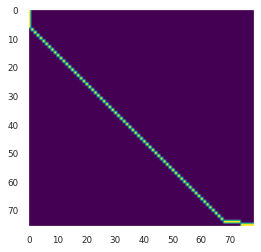

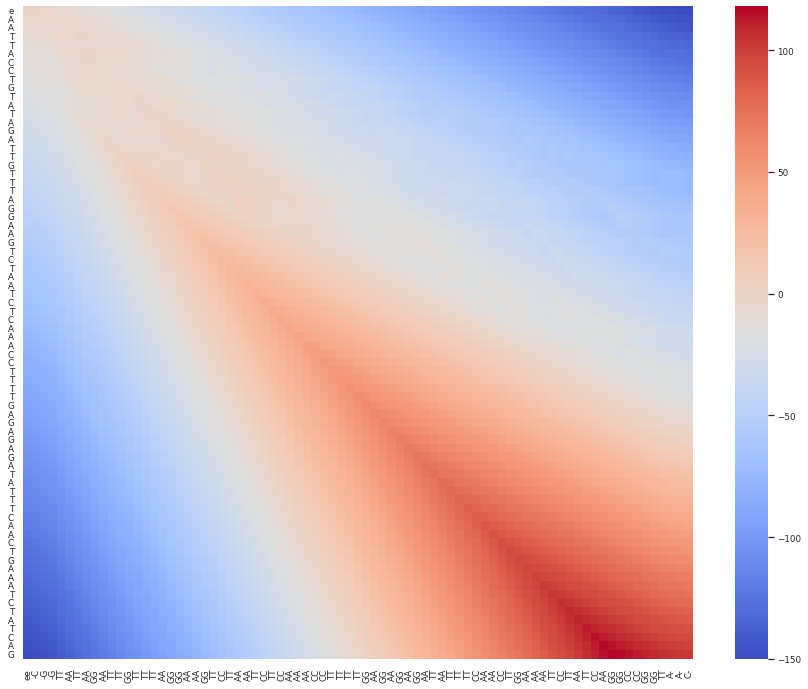

In [64]:
print("LOGIC -1")
pw_seq1,pw_seq2 = backtr(omicron_rbd,hiroshima_rbd,0) # get the pairwise alignment
back_seq1,back_seq2 = backtr_ext([wuhan_rbd],[pw_seq1,pw_seq2],1) # get the backtrack and the multiple alignment 
print("NWA SCORE of three sequences with pairwise aligning omicron and hiroshima first: ",
      ext_nwa([wuhan_rbd],[pw_seq1,pw_seq2])[len(wuhan_rbd),len(pw_seq1)],"\n")
print(back_seq1[0])
print(map_array(back_seq1[0],back_seq2[0],back_seq2[1]))
print(back_seq2[0])
print(map_array(back_seq1[0],back_seq2[0],back_seq2[1]))
print(back_seq2[1],"\n","\n")
print("Backtrack and NW matrix plots")
nw_mat = ext_nwa([wuhan_rbd],[pw_seq1,pw_seq2])
sns.set(font_scale = .8) # print the NW matrix
fig, ax = plt.subplots(figsize=(15, 12))
y_lbl = list("e"+wuhan_rbd)
x_lbl = list(["ee"]+ zip_seq([pw_seq1,pw_seq2]))
ax = sns.heatmap(nw_mat,xticklabels=x_lbl, yticklabels=y_lbl,cmap='coolwarm',fmt='.1f')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# In NW matrix plot - the column values are shown at the bottom of the chart

LOGIC -2
NWA SCORE of three sequences with pairwise aligning wuhan and omicron first:  121.0 

------CGGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGT---
         |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||     |    
AATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCA-----G----
         |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||     |    
---------TATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC 
 

Backtrack and NW matrix plots


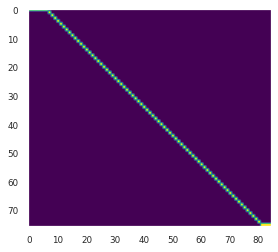

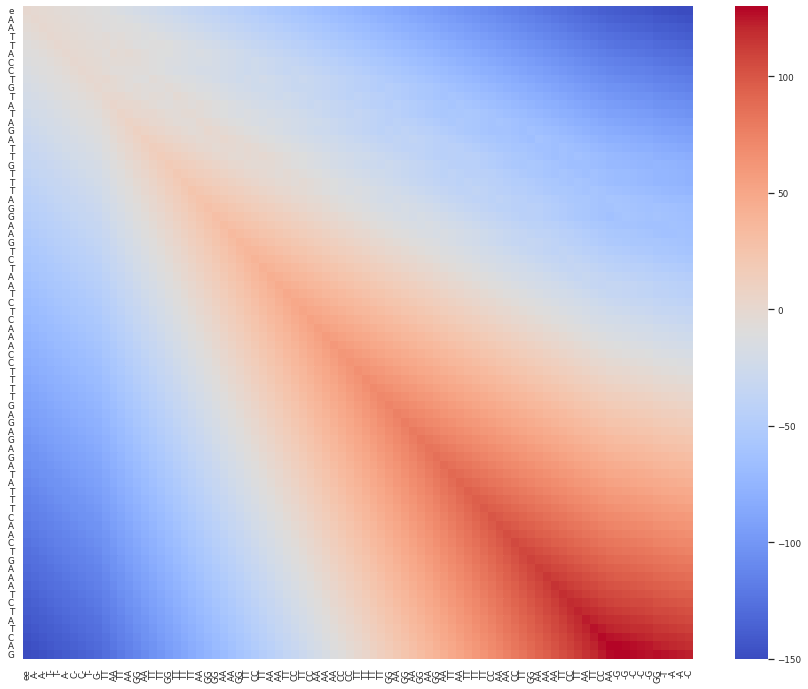

In [69]:
print("LOGIC -2")
pw_seq1,pw_seq2 = backtr(wuhan_rbd,omicron_rbd,0)
back_seq1,back_seq2 = backtr_ext([hiroshima_rbd],[pw_seq1,pw_seq2],1)
print("NWA SCORE of three sequences with pairwise aligning wuhan and omicron first: ",
      ext_nwa([hiroshima_rbd],[pw_seq1,pw_seq2])[len(hiroshima_rbd),len(pw_seq1)],"\n")
print(back_seq1[0])
print(map_array(back_seq1[0],back_seq2[0],back_seq2[1]))
print(back_seq2[0])
print(map_array(back_seq1[0],back_seq2[0],back_seq2[1]))
print(back_seq2[1],"\n","\n")
print("Backtrack and NW matrix plots")
nw_mat = ext_nwa([wuhan_rbd],[pw_seq1,pw_seq2])
sns.set(font_scale = .8) # print the NW matrix
fig, ax = plt.subplots(figsize=(15, 12))
y_lbl = list("e"+wuhan_rbd)
x_lbl = list(["ee"]+ zip_seq([pw_seq1,pw_seq2]))
ax = sns.heatmap(nw_mat,xticklabels=x_lbl, yticklabels=y_lbl,cmap='coolwarm',fmt='.1f')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# In NW matrix plot - the column values are shown at the bottom of the chart

#Task-2

In [ ]:
# # Importing sequences
human = seq_extract("NM_001030.6")

mouse = seq_extract("NM_027015.4")

chimp = seq_extract("NM_001251997.1")

catfs = seq_extract("XM_026928592.1")

algtr = seq_extract("XM_006030956.2") 


In [67]:
len(human),len(mouse),len(chimp),len(catfs),len(algtr)

(352, 370, 362, 553, 601)

In [129]:
seqncs = [human,mouse,chimp,catfs,algtr] # A sequence list of all the species

In [132]:
dist_mat = np.zeros((len(seqncs),len(seqncs))) # intialised the distance matrix

for i in range(len(seqncs)):
  for j in range(len(seqncs)):
    
    if i < j:
      pw_alg1,pw_alg2 = backtr(seqncs[i],seqncs[j],0)
      A = len(pw_alg1) # length og alignment
      S = nwa(seqncs[i],seqncs[j])[len(seqncs[i]),len(seqncs[j])] # NW score
      dist_mat[i,j] = round(((A-S)/A)*100,0) # populating distances by normalising NW score with length of the alignment

dist_mat = dist_mat + dist_mat.T # creating whole matrix by adding the transpose, as we know it is symmentric.

In [133]:
dist_mat

array([[ 0., 26., 10., 90., 95.],
       [26.,  0., 19., 86., 92.],
       [10., 19.,  0., 87., 91.],
       [90., 86., 87.,  0., 65.],
       [95., 92., 91., 65.,  0.]])

In [134]:
# neighbor joining method(NJM)
def NJM_pair(dist_list):
  n = dist_list.shape[0] # number of sequences
  pairing_dict = {} # dictionary mapping to keep track of pair of sequences to be merged based on NJM logic in each iteration, as key
                    # and also return the distances of the merged node with all the sequences as value of the dictionary.

  # keep reducing the dist matrix by size 1, untill it becomes 2x2 . 
  while n > 2 :

    r = [] # gets row sum of all the rows of the distance matrix
    for i in range(dist_list.shape[0]):
      r.append(np.sum(dist_list[i])) 

    #print(dist_list,r)
    # Iterates over upper triangular matrix to find the pair which satisty the Condition below
    min = 10000
    for i in range(dist_list.shape[0]):
      for j in range(dist_list.shape[1]):
        if i<j:
          param1 = dist_list[i,j] - (r[i]+r[j])/(n - 2) # Condition --> Minimizing criteria based on NJM
          #print(param1)
          if param1 < min: # gets the pairs with minimum param1 value
            min = param1
            pairs = (i,j)
            M_ij = dist_list[i,j]
        else: pass
    dist_nuN_othr = []
    new_dist_list = np.zeros((n-1,n-1)) # intialised new distance matrix
    k = 1
    lookup_pairs = list(pairs) # pairs which met the above condition, and to be merged to form a new node
    # finding distance of the new node from all sequences
    for i in range(n):
      if i == pairs[0]: # suppose the pair is (a,b), here it calcualte distance of new node from "a"
        dist = 0.5*(M_ij+(r[pairs[0]]-r[pairs[1]])/(n-2))

      elif i == pairs[1]: # calcualte distance of new node from "b"
        dist = 0.5*(M_ij+(r[pairs[1]]-r[pairs[0]])/(n-2))

      else: # here it calculate distances from other sequences apart from the sequences in the "pair".
        dist = (dist_list[pairs[0],i] + dist_list[pairs[1],i] - M_ij)/2

        # populating the new distance matrix based on the new and prior distances
        new_dist_list[0,k] = dist # zeroth row, I have kept fixed for the new node.
        try:
          new_dist_list[k,k:] = [j for id,j in enumerate(dist_list[i]) if id not in lookup_pairs] # populating prior distances
        except:
          pass
        lookup_pairs += [i]
        k += 1
      dist_nuN_othr.append(dist)
    pairing_dict[str(pairs[0])+"-"+str(pairs[1])+","+str(n)] = dist_nuN_othr # Key-value pair as explained above
    #break
    n = n-1
    dist_list = new_dist_list + new_dist_list.T 
  return pairing_dict

In [135]:
map_dict = NJM_pair(dist_mat)

map_dict

{'0-1,3': [7.125, 7.625, 2.375],
 '0-2,4': [46.125, 14.75, 10.375, 9.5],
 '3-4,5': [60.0, 56.5, 56.5, 30.0, 35.0]}

['P1', 'catfish', 'alligator', 'P2', 'mouse', 'P3', 'human', 'chimpanzee']
[('P1', 'catfish'), ('P1', 'alligator'), ('P1', 'P2'), ('P2', 'mouse'), ('P2', 'P3'), ('P3', 'human'), ('P3', 'chimpanzee')]


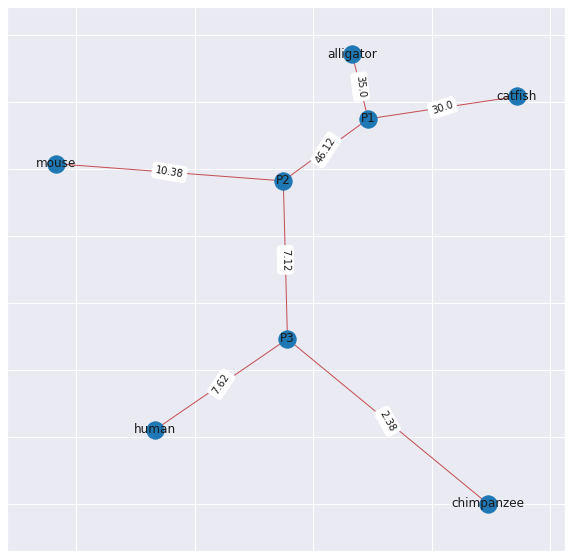

In [139]:
# Plot the phylogenetic tree in terms of a graph
# utlizing the above generated mapping dictionary to plot the graph.
prior_nodes = ["human","mouse","chimpanzee","catfish","alligator"] # kept in the order of the list "seqncs"


G = nx.Graph() # Networkx library
new_node = 1
var_len = len(map_dict.keys()) + 1
for key,value in map_dict.items(): # iterate over the items of the dictionary to add an edge in the graph.
  if var_len > 2:
    pair = [int(i) for i in (key.split(",")[0]).split("-")]

    G.add_edges_from([("P{}".format(new_node),prior_nodes[pair[0]])],weight=round(value[pair[0]],2))
    G.add_edges_from([("P{}".format(new_node),prior_nodes[pair[1]])],weight=round(value[pair[1]],2))

    prior_nodes = ["P{}".format(new_node)] + [j for id,j in enumerate(prior_nodes) if id not in pair]
    
  else: # In the last iteration both the edges are added
    pair = [int(i) for i in (key.split(",")[0]).split("-")]

    G.add_edges_from([("P{}".format(new_node),prior_nodes[pair[0]])],weight=round(value[pair[0]],2))
    G.add_edges_from([("P{}".format(new_node),prior_nodes[pair[1]])],weight=round(value[pair[1]],2))
    prior_nodes = ["P{}".format(new_node)] + [j for id,j in enumerate(prior_nodes) if id not in pair]
     # for the node at the last index of the value in the last iteration.
    G.add_edges_from([("P{}".format(new_node),prior_nodes[1])],weight=round(value[pair[1]+1],2)) 

  var_len = var_len - 1
  new_node += 1

print(G.nodes())
print(G.edges())
plt.figure(figsize = (10,10))
pos = nx.spring_layout(G)
edge_labels = dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx_edges(G, pos, edge_color='r')

plt.show()


In [141]:
dist_mat # to check the results with the graph created above.

array([[ 0., 26., 10., 90., 95.],
       [26.,  0., 19., 86., 92.],
       [10., 19.,  0., 87., 91.],
       [90., 86., 87.,  0., 65.],
       [95., 92., 91., 65.,  0.]])

In [142]:
# check if the matrix is additive or not
def check_addtv(iter,dist_mat):
  leng = dist_mat.shape[0] 
  for i in range(iter):

    inds = []
    z = 0
    while len(inds) < 4: # randomply picks 4 indexes in the order i,j,k,l
      rd = np.random.randint(0,leng)
      if z == 0:
        inds.append(rd)
      else:
        if rd not in inds:
          inds.append(rd)
      z +=1
    # four point logic 
    d_ij = dist_mat[inds[0],inds[1]]
    d_kl = dist_mat[inds[2],inds[3]]
    d_ik = dist_mat[inds[0],inds[2]]
    d_jl = dist_mat[inds[1],inds[3]]
    d_il = dist_mat[inds[0],inds[3]]
    d_jk = dist_mat[inds[1],inds[2]]

    print(inds)
    if ((d_ij + d_kl == d_ik + d_jl) & (d_ik + d_jl >= d_il + d_jk)) == True:
      print("matrix is additive")
      break
    else:
      print("matrix is not additive")
      pass


In [ ]:
check_addtv(100,dist_mat)